### Titanic
**The sinking of the RMS Titanic in the early morning of 15 April 1912, four days into the ship's maiden voyage from Southampton to New York City, was one of the deadliest peacetime maritime disasters in history, killing more than 1,500 people. The largest passenger liner in service at the time, Titanic had an estimated 2,224 people on board when she struck an iceberg in the North Atlantic. The ship had received six warnings of sea ice but was travelling at near maximum speed when the lookouts sighted the iceberg. Unable to turn quickly enough, the ship suffered a glancing blow that buckled the starboard (right) side and opened five of sixteen compartments to the sea. The disaster caused widespread outrage over the lack of lifeboats, lax regulations, and the unequal treatment of the three passenger classes during the evacuation. Inquiries recommended sweeping changes to maritime regulations, leading to the International Convention for the Safety of Life at Sea (1914), which continues to govern maritime safety**

## **Importing Libraries and Dataset**

In [ ]:
#importing Modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#importing drive and mounting

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path='/content/drive/MyDrive/Colab Notebooks/csv/titanic.csv'

Mounted at /content/drive


In [ ]:
pd.read_csv(file_path)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df=pd.read_csv(file_path)

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## **Data preprocessing**

In [ ]:
#finding null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* **Cabin, Age and Embarked features have null values.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df1=df.copy()

In [ ]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## **Exploratory data analysis**

### **1. Total survived ratio for male and female**

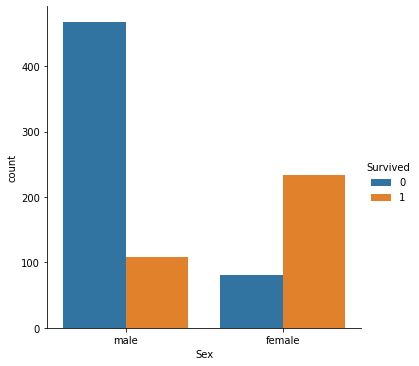

In [ ]:
sns.catplot(x = 'Sex',hue='Survived',kind="count",data=df1)

* **MALE SURVIVING RATE-20%** around
* **FEMALE SURVIVING RATE-75%** around
* **male or a female plays an important role in determining if one is going to survive.**

In [ ]:
group=df1.groupby(['Pclass','Survived'])

In [ ]:
pclass_survived=group.size().unstack()

### **2. Correlation between Pclass and Survived**

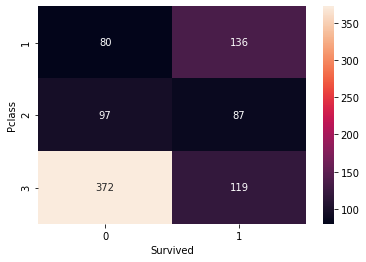

In [ ]:
sns.heatmap(pclass_survived,annot=True,fmt="d")

* **Class 1 pasenger have a higher survivel chance compared to classes 2 and 3.**
* **Pclasss contributes a lot to a passenger survival rate.**

### **3. Age(continues feature) vs Survived**

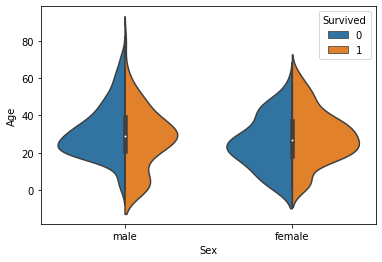

In [ ]:
sns.violinplot(x='Sex',y='Age', hue='Survived',data=df1,split=True)

* This graph gives the summary of the age range of men,women and children who were saved. The survival rate is:
    * **Good for childrens.**
    * **High for womens in age range 20-50.**
    * **Less for men as age increases.**

### **4. Family_size vs Survived**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


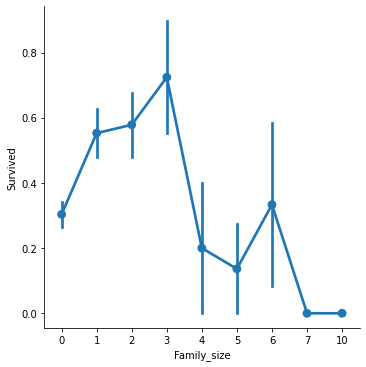

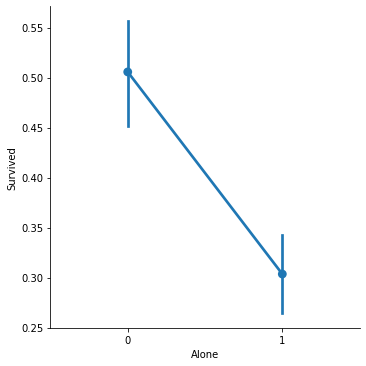

In [ ]:
# adding a column Family_size

df1['Family_size']=0
df1['Family_size']= df1['Parch']+ df1['SibSp']

# adding a column Alone

df1['Alone']=0
df1.loc[df1.Family_size==0, 'Alone']=1

# factor plot for Family_size
sns.factorplot(x="Family_size",y="Survived",data=df1)

# factor plot for Alone\

sns.factorplot(x="Alone",y="Survived",data=df1)

* **Family_size** denotes the number of people in a passenger's family.
    * it calculated by summing SibSp and Parch columns of a respective passenger.

*  **Alone**-another column added to check the chance of survival of a lone passenger against the one with family.

* **important observations-**
    * **if a passenger is alone the survival rate is less.**
    * **if the family size is greater than 5, chances of survival decreases considerably.**

### **5. Bar Plot for Fare (Continuous Feature)** 

* **qcut**
* This function tries to divide the data into equal-sized bins. 
* The bins are defined using percentiles, based on the distribution and not on the actual numeric edges of the bins. 

In [ ]:
df1['Fare_Range'] = pd.qcut(df1['Fare'], 4)

* Barplot - Shows approximate values based on the height of bars.

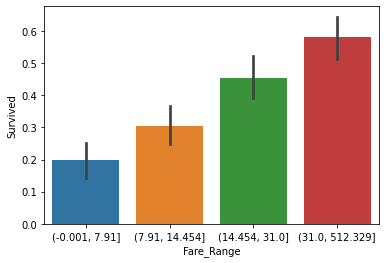

In [ ]:
sns.barplot(x="Fare_Range",y="Survived",data=df1)


* it can be concluded that **if a passenger paid higher fare the survivel rate is more.**

### **6.  Categorical count plots for Embarked Feature**

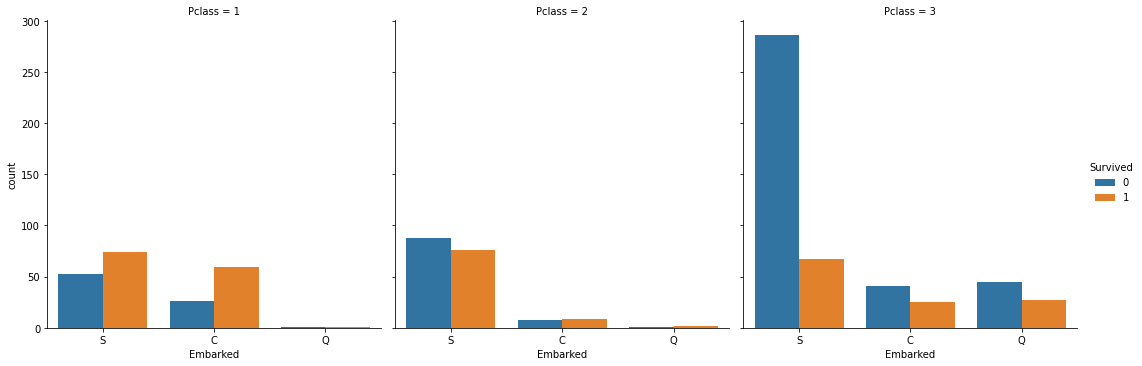

In [ ]:
# countplot

sns.catplot(x='Embarked',hue='Survived',kind='count',col='Pclass',data= df1)

* **Majority of passengers boarded from S.**
* **Majority of class 3 passengers boarded from Q.**
* **S looks lucky for class 1 and 2 passengers compared to class 3.**

## **Conclusions:**
  *  **1. Male or a female plays an important role in determining if one is going to survive.**
  *  **2. Pclasss contributes a lot to a passenger survival rate.**
  *  **3. Survival rate is Good for childrens ,high for womens in age range 20-50 and Less for men as age increases.**
  *  **4. Famlily size plays important role in survival if a passenger is alone the survival rate is less.if the family size is greater than 5, chances of survival decreases considerably.**
  *  **5. It can be concluded that if a passenger paid higher fare the survivel rate is more.**
  *  **6. Embarked feature also play role as S looks lucky for class 1 and 2 passengers compared to class 3.**